<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/Regression_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('housePrice.csv')

In [ ]:
print(data.head())

  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


In [ ]:
data.shape

(3479, 8)

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 2
Integer variables: 1
Float variables: 2


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(data['Parking'])
data['Parking']=label
label1=le.fit_transform(data['Warehouse'])
data['Warehouse']=label1
label2=le.fit_transform(data['Elevator'])
data['Elevator']=label2
label3=le.fit_transform(data['Address'])
data['Address']=label3
print(data.head())

  Area  Room  Parking  Warehouse  Elevator  Address         Price
0   63     1        1          1         1      156  1.850000e+09
1   60     1        1          1         1      156  1.850000e+09
2   79     2        1          1         1      117  5.500000e+08
3   95     2        1          1         1      152  9.025000e+08
4  123     2        1          1         1      150  7.000000e+09


In [21]:
from sklearn.preprocessing import StandardScaler
z = data[['Price']]
scaler = StandardScaler()
features = scaler.fit_transform(z)
data['Price']=features
data['Price']

0      -0.433278
1      -0.433278
2      -0.593797
3      -0.550272
4       0.202621
          ...   
3474   -0.229544
3475    0.177925
3476   -0.616640
3477    0.029755
3478   -0.617257
Name: Price, Length: 3479, dtype: float64

In [22]:
p = data[['Price']]
scaler = StandardScaler()
features = scaler.fit_transform(p)
data['Area']=features
data['Area']

0      -0.433278
1      -0.433278
2      -0.593797
3      -0.550272
4       0.202621
          ...   
3474   -0.229544
3475    0.177925
3476   -0.616640
3477    0.029755
3478   -0.617257
Name: Area, Length: 3479, dtype: float64

In [24]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,-0.433278,1,1,1,1,156,-0.433278
1,-0.433278,1,1,1,1,156,-0.433278
2,-0.593797,2,1,1,1,117,-0.593797
3,-0.550272,2,1,1,1,152,-0.550272
4,0.202621,2,1,1,1,150,0.202621


<Axes: >

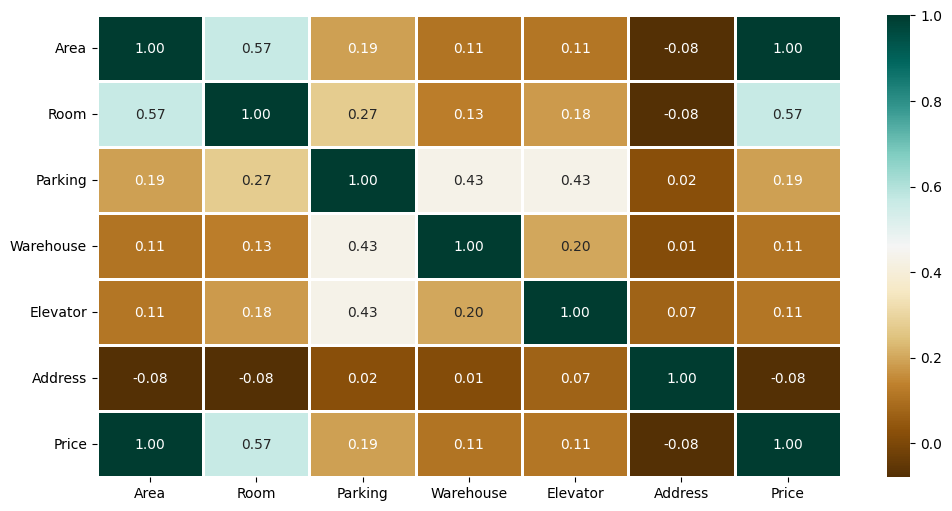

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [27]:
print(data.isnull().sum())

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64


In [28]:
from sklearn.preprocessing import OneHotEncoder
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Warehouse'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Address'}>, <Axes: >, <Axes: >]],
      dtype=object)

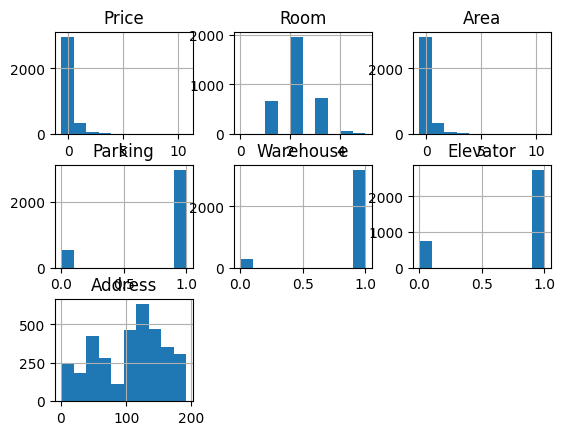

In [29]:
viz= data[['Price', 'Room','Area', 'Parking', 'Warehouse', 'Elevator', 'Address']]
viz.hist()

In [38]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Parking","Room","Area", "Warehouse", "Elevator", "Address"]])
y = np.array(data[["Price"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [39]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[-1.00424818e-15  2.44249065e-15  1.00000000e+00 -2.56739074e-16
   1.66533454e-16  5.55111512e-17]]
Intercept: [-1.00267017e-14]


In [41]:
print("Price: ")
a= float(input("Area:"))
b = float(input("Parking"))
c= float(input("Room:"))
d= float(input("Address:"))
e= float(input("Warehouse:"))
f= float(input("Elevator:"))
features= np.array([[a, b, c, d, e, f]])
print("Price=", regr.predict(features))

Price: 
Area:125
Parking0
Room:2
Address:158
Warehouse:0
Elevator:1
Price= [[2.]]


In [52]:
from sklearn.metrics import r2_score
x_test=np.asanyarray(test[["Parking","Room","Area", "Warehouse", "Elevator", "Address"]])
y_test=np.asanyarray(test[['Price']])
y_hat= regr.predict(x_test)
print("Mean Absolute Error: %.2f" %np.mean(np.absolute(y_hat- y_test)))
print("Residual sum of square (MSE): %.2f" %np.mean((y_hat - y_test)**2))
print("R2_score:%.2f" %r2_score(y_test, y_hat))

Mean Absolute Error: 0.00
Residual sum of square (MSE): 0.00
R2_score:1.00
